<a href="https://colab.research.google.com/github/kleber-ao/Simulation-Data/blob/master/code_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

System size = 100000, activity rate = 1, innovation probability = 0 , mean degree = 10 and degree variance = 0
Parameter R = 1000 means each iteration does 1000 steps for each of the 10000 simulations.
For ages [0.1, 1, 10], the corresponding value in Euler-Maruyama steps order is 
10.0
100.0
1001.0
time taken for simulation = 26.842472076416016 seconds.


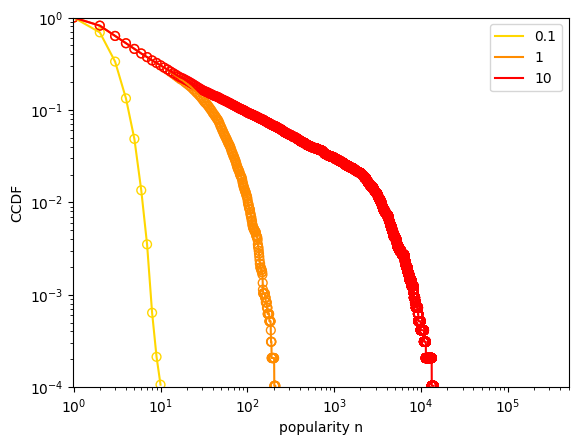

In [ ]:
## This code approximates the competition-induced criticality model (see code below) via a stochastic differential equation

# Import packages
import time
import numpy as np
import matplotlib.pyplot as plt

"""Parameters"""
# Number of simulations/memes
num_sims = 10000

## System Specifics ##
#------------------#
# Activity Rate:
beta = 1
# Innovation Probability:
mu = 0
# Mean Degree:
z = 10
# Degree Standard Deviation:
sigma = 0 # notice the square of this number (variance) should match z for a poisson-distributed out-degree!
# Number of Screens:
N = 100000
#------------------#

## Initial condition ##
s_0 = (1 + z)/N # this works for a regular network
# For a poisson-distributed degree, an array of size num_sims is required, where
# each element is (1 + k)/N and k is a random number drawn from a poisson
# distribution with parameter z
y_0 = 1

## Time Specifics ##
#------------------#
list_of_ages = [0.1, 1, 10]
# Ending time
T = max(list_of_ages)
# Total number of retweets and innovations
N_events = T*N
# Time increments
dt = float(T) / N_events
# Times
t = np.arange(0, T, dt)

## Euler-Maruyama Step Specifics ##
R = 1000 # how many linear time increments are to be combined together
EM_steps = int(N_events/R) # number of steps in the Euler-Maruyama iteration
Dt = R*dt # size of the Euler-Maruyama step

# Console messages
print('System size = ' + str(N) + ', activity rate = ' + str(beta) + ', innovation probability = ' + str(mu), ', mean degree = ' + str(z) + ' and degree variance = ' + str(sigma**2))
print('Parameter R = ' + str(R) + ' means each iteration does ' + str(EM_steps) + ' steps for each of the ' + str(num_sims) + ' simulations.')
print('For ages ' + str(list_of_ages) + ', the corresponding value in Euler-Maruyama steps order is ')

## Plot Variable ##
#------------------#
popularity = {}

age = np.zeros(len(list_of_ages))
# adjust ages for EM_steps
for a in range(len(list_of_ages)):
	age[a] = int(np.round(list_of_ages[a]*(EM_steps+1)/T))
	print(age[a])
	popularity[age[a]] = np.zeros(num_sims)

#------------------#
# Mark runtime
tic = time.time()

"""Iteration"""
for n in range(num_sims):

	# Initialize trajectories
	s = s_0
	y = y_0

	# White noise
	W = np.sqrt(R*dt)*np.random.normal(loc = 0.0, scale = 1, size=EM_steps-1)
	W2 = np.sqrt(R*dt)*np.random.normal(loc = 0.0, scale = 1, size=EM_steps-1)

	for i in np.arange(EM_steps-1)+1: # starts at 1 and ends at EM_steps
		# Simulate trajectory s from equation
		s = s + (beta*mu*(-1-z)*s)*Dt + np.sqrt( s*(mu - s*(mu**2) - z*(-1 + s + 2*s*mu*(-1 + s*mu)) - (z**2)*(-1 + 3*s*((-1 + mu)**2) + mu + (s**3)*(2 + 4*mu*(-1 + mu)) + (s**2)*(-4 + 8*mu - 6*(mu**2))) + (1 - mu + s*(-1 + 2*mu))*sigma**2 )*(beta/N) ) * W[i-1]

		# Absorbing boundary condition
		if s<=0:
			s=0
			break

		# Associated popularity then is given by
		y = y + N*beta*s*Dt + np.sqrt(N*beta*s*(1-s))*W2[i-1]

		for a in age:
			if a == i: # if the i-th iteration corresponds to one of the ages in
			# list_of_ages adjusted to EM_steps,
				popularity[a][n] = y

	# if the loop broke before filling popularity values for all ages,
	for a in age:
		if popularity[a][n] == 0:
			popularity[a][n] = y

toc = time.time()
print('time taken for simulation = ' + str(toc-tic) + ' seconds.')

# Plot

legend_label = ['0.1','1','10']
colortoplot = ['gold','darkorange','red']

for a in range(len(list_of_ages)):
    # the following lines create a histogram and probability mass function
    # (pmf):
	bins=[i+0.5 for i in np.arange(int(max(popularity[age[a]]))+1)]
	pmf=np.histogram(popularity[age[a]], bins=bins,density = True)[0]
	nv=np.array([i+1 for i in np.arange(len(pmf))])
	# next, convert the pmf to a ccdf:
	c=1-np.cumsum(pmf)
	c=np.append(1,c) # put 1 into first position
    #
	plt.scatter(nv,c[:-1],facecolors='none',edgecolors=colortoplot[a],marker='o',s=40) # comment this line to plot only lines
	plt.plot(nv,c[:-1],color=colortoplot[a], label=legend_label[a])

plt.legend()
plt.xlim(10**(-0.01),5*10**5)
plt.ylim(10**-4,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('popularity n')
plt.ylabel('CCDF')
plt.show()
plt.close()


regular network.
N=100000
mu = 0.01
listofages = [0.1, 1, 10]
largestage = 10.0
endt = 30.0
report ages=3


<ipython-input-2-5104db94557b>:23: DeprecationWarning: Please import `coo_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.coo` namespace is deprecated and will be removed in SciPy 2.0.0.
  A = pickle.load(input_file)


number of memes used for plots = 28788
timetaken = 49.79182720184326 seconds.


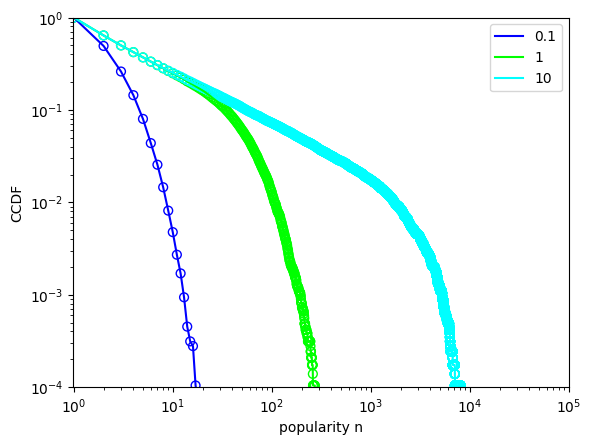

In [2]:
import os
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

directory = os.getcwd()

''' Parameters '''
network_topology = 'regular' # 'regular' or 'scale-free'
mu = 0.01 #0.01 #0.1 #0.02

if network_topology == 'regular':
    filename = 'dat_compete_adj_2a.pickle'
else:
    filename = 'dat_compete_adj_1c.pickle'

print(network_topology + ' network.')

tic = time.time()

with open(directory+'/'+filename, 'rb') as input_file:
    A = pickle.load(input_file)
    A=A.T
    N = A.shape[0]
    print('N=' + str(N))

print('mu = ' + str(mu))
listofages = [0.1, 1, 10]
print('listofages = ' + str(listofages))
reportageslist=[N*i for i in listofages]
largestage=max(reportageslist)/N
print('largestage = ' + str(largestage))
endt=3*largestage # make sure end time is long enough to gather data for largest ages
print('endt = ' + str(endt))
endn=int(endt*N) # ending time step index
print('report ages=' + str(len(reportageslist)))

## Initializing variables to store simulation data
# Variables with size of #memes are created as dictionaries and increased on demand

watchlist = {i:{} for i in range(len(reportageslist))}
tweetingnodelist = {i:np.random.randint(low=1,high=N+1) for i in range(endn)} # Nodes that will tweet are drawn before the simulation starts

innovatetime = {i:(np.random.random()<mu) for i in range(endn)} # Innovation times are drawn before the simulation starts
states = {i:0 for i in np.arange(N)+1}

memesizes = {}
memesizesatage= {i:{} for i in range(len(reportageslist))}
latestmemelabel = 0

# Load neighbourhood into dictionary

followingnodes = {}
for j in np.arange(N)+1:
    followingnodes[j] = []
for i,j,v in zip(A.row, A.col, A.data):
    followingnodes[int(j+1)].append(int(i+1)) # indexes are corrected because users go from 1 to N

# Simulation core

for t in range(endn):

    tweetingnode = tweetingnodelist[t]
    tweetstate = states[tweetingnode]

    if innovatetime[t] or tweetstate==0: # innovation
        latestmemelabel += 1
        memesizes[latestmemelabel] = 1
        states[tweetingnode] = latestmemelabel
        for neighbour in followingnodes[tweetingnode]: # overrides all followers' screens
            states[neighbour] = latestmemelabel
        for ir in range(len(reportageslist)):
            watchlist[ir][t+reportageslist[ir]] = latestmemelabel
    else:                               # retweet
        for neighbour in followingnodes[tweetingnode]: # overrides all followers' screens
            states[neighbour] = tweetstate
        memesizes[tweetstate] += 1

    for ir in range(len(reportageslist)):
        if t in watchlist[ir]:
            memereachedage = watchlist[ir][t]
        else:
            memereachedage = 0
        if memereachedage>0:
            memesizesatage[ir][memereachedage] = memesizes[memereachedage]


# Annotation of old age memes
oldagememes = len(memesizesatage[len(reportageslist)-1])
print('number of memes used for plots = ' + str(oldagememes))

toc = time.time()
print('timetaken = ' + str(toc-tic) + ' seconds.')

# Plot

legend_label = ['0.1','1','10']
colortoplot = ['blue', 'lime', 'cyan']

for ir in range(len(reportageslist)):
    slice = np.array(list(memesizesatage[ir].values()))
    current_size=slice[0:oldagememes] # compare memes which survive to old age
    del slice
    # the following lines create a histogram and probability mass function
    # (pmf):
    bins=[i+0.5 for i in np.arange(max(current_size)+1)]
    pmf=np.histogram(current_size, bins=bins,density = True)[0]
    #pmf=h/h.sum()
    nv=np.array([i+1 for i in np.arange(len(pmf))])
    # next, convert the pmf to a ccdf:
    c=1-np.cumsum(pmf)
    c=np.append(1,c) # put 1 into s=1 position
    #
    plt.scatter(nv,c[:-1],facecolors='none',edgecolors=colortoplot[ir],marker='o',s=40)
    plt.plot(nv,c[:-1],color=colortoplot[ir], label=legend_label[ir])

plt.legend()
plt.xlim(10**(-0.01),10**5)
plt.ylim(10**-4,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('popularity n')
plt.ylabel('CCDF')
plt.show()
plt.close()
